In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv(r'/Users/nehakundaliya/Downloads/loan-train.csv')

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.shape

(614, 13)

In [32]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
pd.crosstab(df['Credit_History'],df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [36]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x13d6db5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x13d6dae30>,
 'boxes': [<matplotlib.lines.Line2D at 0x13d6daa40>],
 'medians': [<matplotlib.lines.Line2D at 0x13d6da710>],
 'fliers': [<matplotlib.lines.Line2D at 0x13d6d9e40>],
 'means': []}

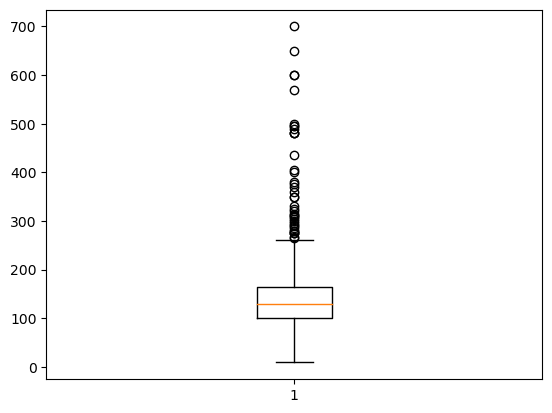

In [38]:
plt.boxplot(df['LoanAmount'])

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

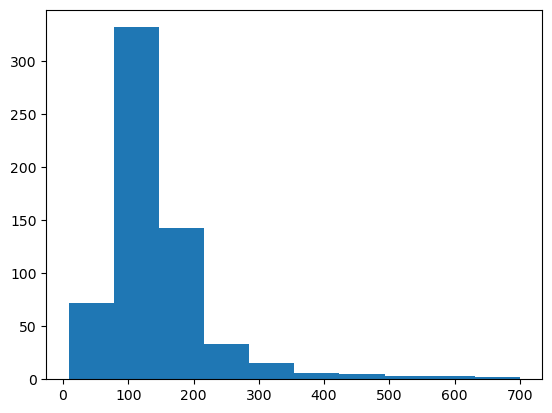

In [39]:
plt.hist(df['LoanAmount'])

It is right skewed. Therefore we need to convert into Normal distribution otherwise our model might be bias

In [41]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

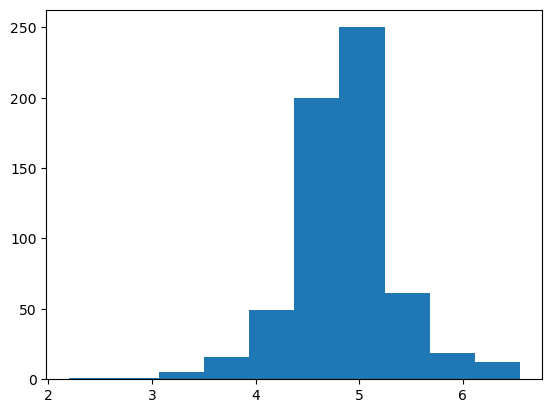

In [42]:
plt.hist(df['LoanAmount_log'])

Now it is normalise.



(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

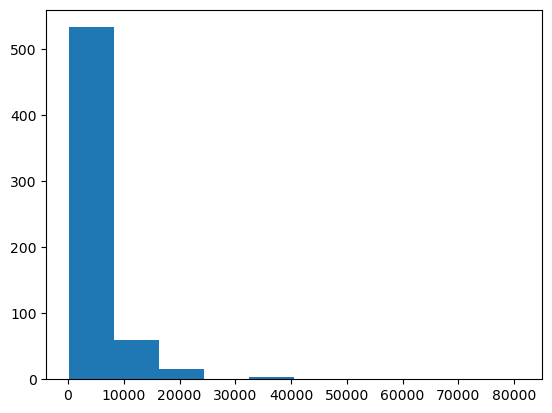

In [52]:
plt.hist(df['ApplicantIncome'])

(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <BarContainer object of 10 artists>)

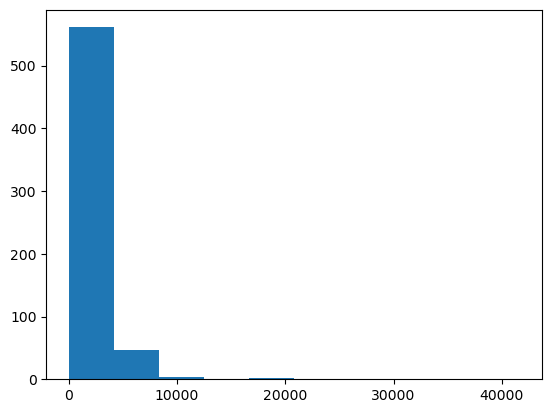

In [44]:
plt.hist(df['CoapplicantIncome'])

In [53]:
df['Total_inc'] = df['CoapplicantIncome'] + df['ApplicantIncome']

(array([513.,  77.,  14.,   1.,   4.,   2.,   1.,   1.,   0.,   1.]),
 array([ 1442. ,  9397.8, 17353.6, 25309.4, 33265.2, 41221. , 49176.8,
        57132.6, 65088.4, 73044.2, 81000. ]),
 <BarContainer object of 10 artists>)

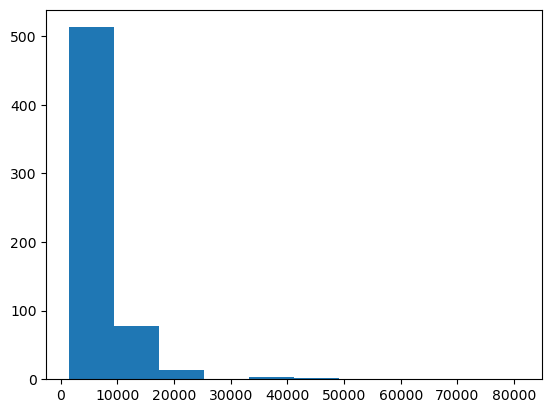

In [54]:
plt.hist(df['Total_inc'])

In [55]:
df['Total_inc_log'] = np.log(df['Total_inc'])

(array([  7.,  53., 186., 205.,  91.,  41.,  20.,   4.,   5.,   2.]),
 array([ 7.27378632,  7.67662813,  8.07946994,  8.48231175,  8.88515356,
         9.28799538,  9.69083719, 10.093679  , 10.49652081, 10.89936262,
        11.30220443]),
 <BarContainer object of 10 artists>)

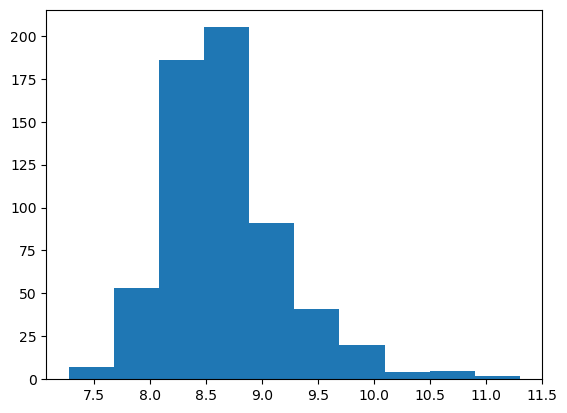

In [57]:
plt.hist(df['Total_inc_log'])

Now it is normally distributed

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [63]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_inc', 'Total_inc_log'],
      dtype='object')

In [66]:
X = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'Total_inc_log']]

In [68]:
Y = df[['Loan_Status']]

In [71]:
LE = LabelEncoder()

In [76]:
categorical = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed',  'Property_Area']

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Total_inc_log     614 non-null    float64
dtypes: float64(4), object(6)
memory usage: 48.1+ KB


In [88]:
for i in categorical:
    X[i]=LE.fit_transform(X[i])

/var/folders/z9/pp2zbk5j7wd6q223rjv0sy000000gn/T/ipykernel_44407/2382834584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=LE.fit_transform(X[i])
/var/folders/z9/pp2zbk5j7wd6q223rjv0sy000000gn/T/ipykernel_44407/2382834584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=LE.fit_transform(X[i])
/var/folders/z9/pp2zbk5j7wd6q223rjv0sy000000gn/T/ipykernel_44407/2382834584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [89]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_inc_log
0,1,0,0,0,0,146.412162,360.0,1.0,2,8.674026
1,1,1,1,0,0,128.000000,360.0,1.0,0,8.714568
2,1,1,0,0,1,66.000000,360.0,1.0,2,8.006368
3,1,1,0,1,0,120.000000,360.0,1.0,2,8.505323
4,1,0,0,0,0,141.000000,360.0,1.0,2,8.699515


In [90]:
Y = LE.fit_transform(Y)

/Users/nehakundaliya/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
DTree = DecisionTreeClassifier()

In [137]:
DTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [138]:
y_pred = DTree.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy_score(y_test,y_pred)

0.6829268292682927

In [135]:
from sklearn.naive_bayes import GaussianNB

In [115]:
NB = GaussianNB()

In [116]:
NB.fit(X_train,y_train)

GaussianNB()

In [119]:
y_pred = NB.predict(X_test)

In [120]:
accuracy_score(y_test,y_pred)

0.8373983739837398